# Basic Linear Classifier

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's define a synthetic dataset and experiment on it. We will need to define a `pandas` dataframe with 3 columns using the 3 arrays given below.

In [98]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])


##### YOUR CODE HERE ####
data = [x1,x2,y]
data = pd.DataFrame(data).transpose()
print(data[0])
##### YOUR CODE HERE ##### 

0     5
1     6
2     7
3     7
4     8
5     9
6     0
7     1
8     2
9     4
10    5
11    6
Name: 0, dtype: int32


Plot the data in axes $x_1$ and $x_2$, highlight two classes with different colors, name the axes.

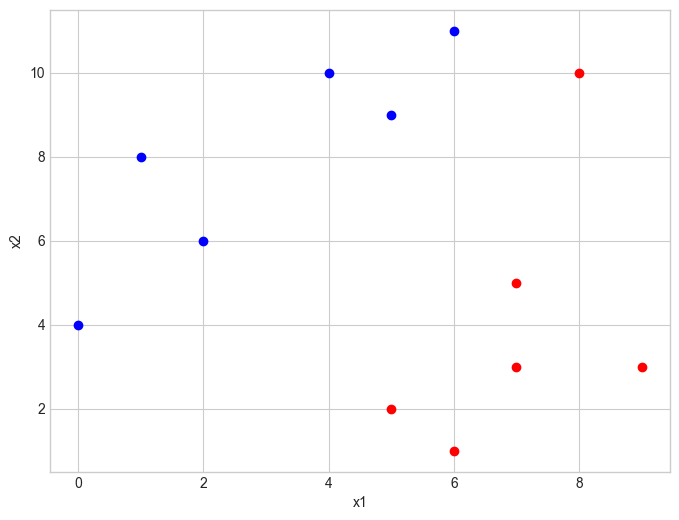

In [99]:
def plot_data(data): 
    plt.figure(figsize=(8, 6))
  ##### YOUR CODE HERE ####
    dataR = [[],[]]
    dataB = [[],[]]
    for i in range(len(data[2])):
        if data[2][i]==1:
            dataR[0].append(data[0][i])
            dataR[1].append(data[1][i])
        else:
            dataB[0].append(data[0][i])
            dataB[1].append(data[1][i])
    plt.plot(dataR[0], dataR[1], 'ro')
    plt.plot(dataB[0], dataB[1], 'bo')
    plt.ylabel("x2")
    plt.xlabel("x1")
  ##### YOUR CODE HERE ##### 

plot_data(data)

Find and highlight in the plot the center of mass for each of the two classes as well as the middle point between these centers.

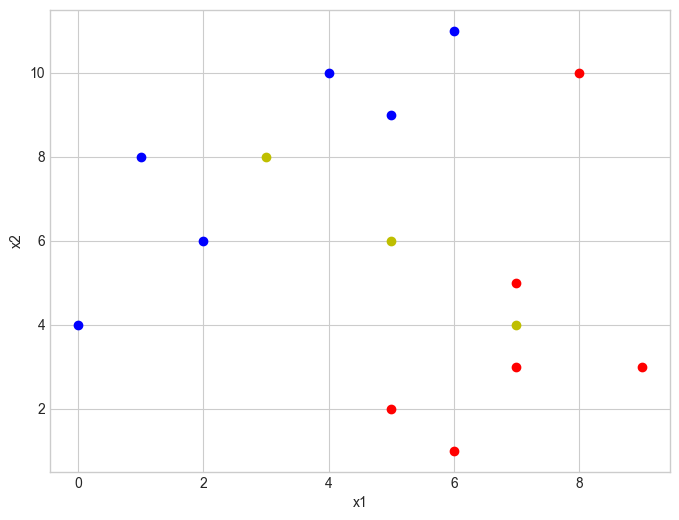

In [100]:
plot_data(data)
##### YOUR CODE HERE ##### 
dataR = [[],[]]
dataB = [[],[]]
for i in range(len(data[2])):
    if data[2][i]==1:
        dataR[0].append(data[0][i])
        dataR[1].append(data[1][i])
    else:
        dataB[0].append(data[0][i])
        dataB[1].append(data[1][i])
middleX = [[sum(dataR[0])/len(dataR[0])],[sum(dataB[0])/len(dataB[0])]]
middleY = [[sum(dataR[1])/len(dataR[1])],[sum(dataB[1])/len(dataB[1])]]
for i in range(len(middleX)):
    plt.plot(middleX[i], middleY[i],"yo")
mid = [(middleX[0][0]+middleX[1][0])/2, (middleY[0][0]+middleY[1][0])/2]
plt.plot(mid[0],mid[1],"yo")

##### YOUR CODE HERE ##### 
plt.show()

Find the equation of the decision boundary line chosen by the basic linear classifier and add it to the plot. 

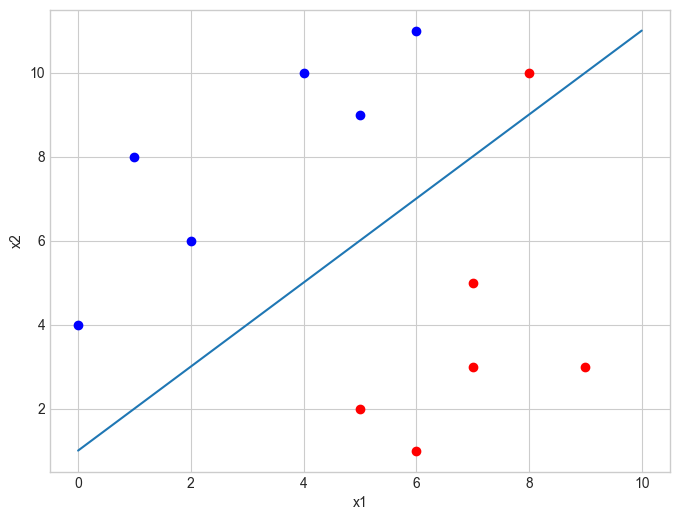

In [101]:
plot_data(data)
##### YOUR CODE HERE ##### 
n = [middleX[1][0]-middleX[0][0],middleY[1][0]-middleY[0][0]]
y = [(n[0]*mid[0]+n[1]*mid[1]-n[0]*0)/n[1],(n[0]*mid[0]+n[1]*mid[1]-n[0]*10)/n[1]]
plt.plot([0,10],[y[0],y[1]])
##### YOUR CODE HERE ##### 
plt.show()

* Did you notice any misclassified instances? 

* Are the classes linearly separable in the training data? 



##Using Drive files

You can upload your files to drive and use/change them from Google Colab.
This can help you avoid losing written code.

[How to mount Drive](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166#11b0)

In [102]:
# from google.colab import drive
# drive.mount('/content/drive')

In [130]:
cd C:\Users\King\Desktop\ML Labs

C:\Users\King\Desktop\ML Labs


# K-nearest neighbours

In this exercise you will program your own KNN algorithm and compare it to sklearn's implementation. We will use `car.csv` dataset for this. The dataset is from [kaggle](https://www.kaggle.com/elikplim/car-evaluation-data-set).

In [131]:
data = pd.read_csv("Lab_files/Lab1/car.csv", dtype="category", header = None)
data.columns = ["buying", "maint", "doors", "persons", 
                "lug-boot", "safety", "accept"]

In [132]:
print(data.shape)
data.head()

(1728, 7)


,buying,maint,doors,persons,lug-boot,safety,accept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Use the `train_test_split` method (use the documentation) to divide the data into 75% training and 25% testing data. Use parameter random_state = 0 to set the same random seed and ensure that we all get the same results.

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],
                                                    data['accept'],
                                                    test_size=0.25,
                                                    random_state=0)

In [134]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1296, 6) (432, 6) (1296,) (432,)


In [135]:
data.accept.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: accept, dtype: int64

In [136]:
def accuracy(actual, predicted):
  return sum(actual == predicted) / len(predicted)

Upload the `Courses/MachineLearning/Labs/Lab_files/Lab1/knn.py` script to Colab drive and complete the code in order to train a KNN model on the training data and test its performance on the testing data. If you do everything correctly you will get around $75 \%$ accuracy on the test set by running the code below.

In [137]:
%cd C:\Users\King\Desktop\ML Labs\Lab_files\Lab1
from knn import KNearestNeighbor
%cd ../

C:\Users\King\Desktop\ML Labs\Lab_files\Lab1
C:\Users\King\Desktop\ML Labs\Lab_files


In [138]:
class KNearestNeighbor(object):
    
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def fit_predict(self, X_test, k=1):
        dists = self.compute_distances(X_test)
        return self.predict_labels(dists, k=k)

    def compute_distances(self, X_test):
        # print(self.X_train.shape)
        dists = [(self.X_train != X_test.iloc[i]).sum(axis=1) for i in range(X_test.shape[0])]
        return dists

    def predict_labels(self, dists, k=1):
        y_pred = []
        for i in dists:
            y_pred.append(self.y_train.iloc[np.bincount(np.argpartition(i, k)[:k]).argmax()])
        return y_pred

In [139]:
model = KNearestNeighbor(X_train, y_train)
predictions = model.fit_predict(X_test, k=1)
accuracy(y_test, predictions)

0.7546296296296297

Now try different values for k, for example $(1,3,...,15)$ and plot the resulting accuracies (on y-axis) with respect to the values of $k$ (on x-axis).

In [140]:
accuracies = []
k_values = range(1, 16, 2)
for k in k_values:
  model = KNearestNeighbor(X_train, y_train)
  predictions = model.fit_predict(X_test, k=k)
  accuracies.append(accuracy(y_test, predictions))

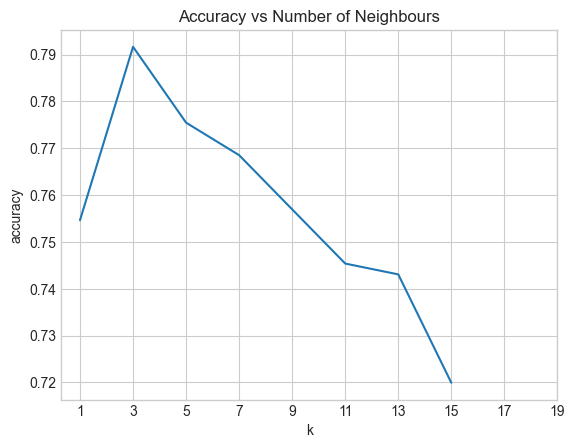

In [141]:
plt.plot(k_values, accuracies)
plt.title('Accuracy vs Number of Neighbours')
plt.ylabel('accuracy')
plt.xticks(range(1, 20, 2))
plt.xlabel('k');

## Comparing with `sklearn`'s implementation

For `sklearn`'s implementation the data should be converted to numeric.

In [142]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data1 = enc.fit_transform(data)

In [143]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1[:, :-1],
                                                        data1[:, -1],
                                                        test_size=0.25,
                                                        random_state=0)

In [144]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=1, metric='hamming')
model2.fit(X_train1, y_train1)
predictions1 = model2.predict(X_test1)
accuracy(y_test1, predictions1)

0.7777777777777778

Sklearn's implementation is different from ours, because it uses optimized algorithms and [tree data-structures](https://www.geeksforgeeks.org/k-dimensional-tree/). You can read more about those approaches [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms). We can still reproduce our result by setting the `algorithm` parameter to `brute`, which stands for the *brute-force* method.

In [145]:
model2 = KNeighborsClassifier(n_neighbors=1, metric='hamming',
                              algorithm='brute')
model2.fit(X_train1, y_train1)
predictions1 = model2.predict(X_test1)
accuracy(y_test1, predictions1)

0.7546296296296297

Now let's look at this simple example.

In [146]:
data = pd.DataFrame({
    'mass':   [4, 5, 5, 5, 6, 7, 11, 11, 13, 13],  
    'height': [2, 1, 2, 3, 2, 4, 8,  10, 8,  10], 
    'label':  ['cat']*5 + ['dog']*5
}, 
    columns = ['mass', 'height', 'label'] # mantains column order
)
data

,mass,height,label
0,4,2,cat
1,5,1,cat
2,5,2,cat
3,5,3,cat
4,6,2,cat
5,7,4,dog
6,11,8,dog
7,11,10,dog
8,13,8,dog
9,13,10,dog


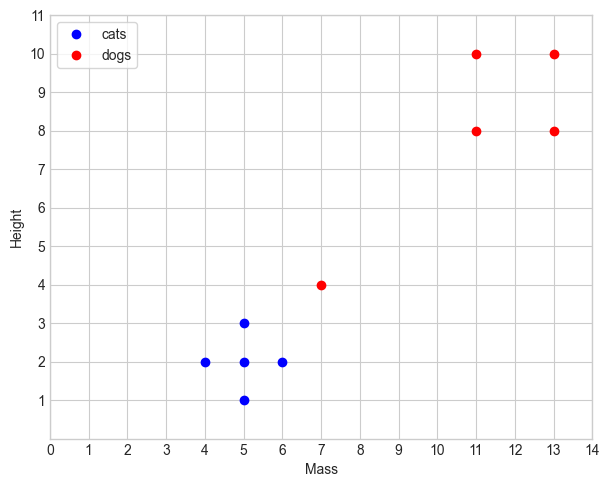

In [147]:
def plot_cats_vs_dogs(data):
    # Specify figure parameters
    fig, ax = plt.subplots(figsize=(7, 5.5)) 
    # Data to plot
    ax.plot(data.loc[data.label == 'cat', 'mass'],
            data.loc[data.label == 'cat', 'height'], 'bo', label='cats') 
    ax.plot(data.loc[data.label == 'dog', 'mass'],
            data.loc[data.label == 'dog', 'height'], 'ro', label='dogs')

    # Specify axes parameters
    ax.set_xticks(list(range(0, 15)))
    ax.set_yticks(list(range(1, 12)))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 11)

    # Axis labels
    ax.set_xlabel('Mass')
    ax.set_ylabel('Height')
    
    return ax

# Show the plot inline
plot_cats_vs_dogs(data)
plt.legend(markerscale=1, frameon=True)
plt.show()

K-nearest neighbours algorithm makes decision for each point based on nearest neighbours' classes. We can visualize decision boundaries to compare classification with different K values.

We have this unknown point (marked with cross). In which class does it belong using 1-NN, or 3-NN...?

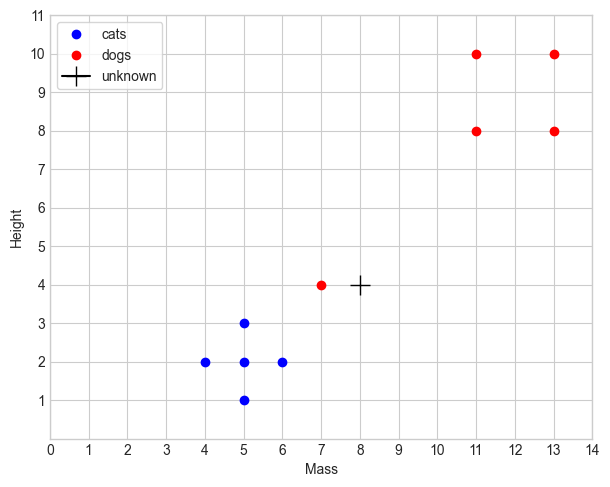

In [148]:
plot_cats_vs_dogs(data)
plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
plt.legend(markerscale=1, frameon=True)
plt.show()

In [149]:
  def create_grid():
    x = np.arange(0, 15, 0.1)
    y = np.arange(0, 12, 0.1)
    xx, yy = np.meshgrid(x, y)
    # Generates all possible combinations
    X_grid = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()}) 
    return X_grid

def plot_model(ax,X_train,y_train,X_grid,model):
    y_pred = model.predict(X_grid)
    X_grid[y_pred=='dog'].plot(x='x',y='y',kind='scatter',
                               s=20,color='red',ax=ax, alpha=0.1, zorder=-1)
    X_grid[y_pred=='cat'].plot(x='x',y='y',kind='scatter',
                               s=20,color='blue',ax=ax, alpha=0.1, zorder=-1)
    X_train[y_train=='dog'].plot(x='x',y='y',kind='scatter',
                                 s=40,color='pink',ax=ax, alpha=0.1, zorder=-1)
    X_train[y_train=='cat'].plot(x='x',y='y',kind='scatter',s=40,
                                 color='lightblue',ax=ax, alpha=0.1, zorder=-1);

In [150]:
def plot_decision_boundaries(model, data):
    X_train = data.iloc[:, :2]
    X_train.columns = ['x', 'y']
    y_train = data.label
    ax = plot_cats_vs_dogs(data)
    X_grid = create_grid()
    model = model.fit(X_train, y_train)
    plot_model(ax, X_train, y_train, X_grid, model)

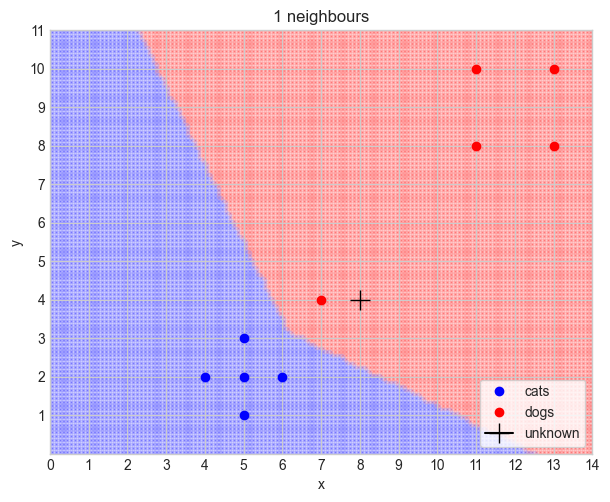

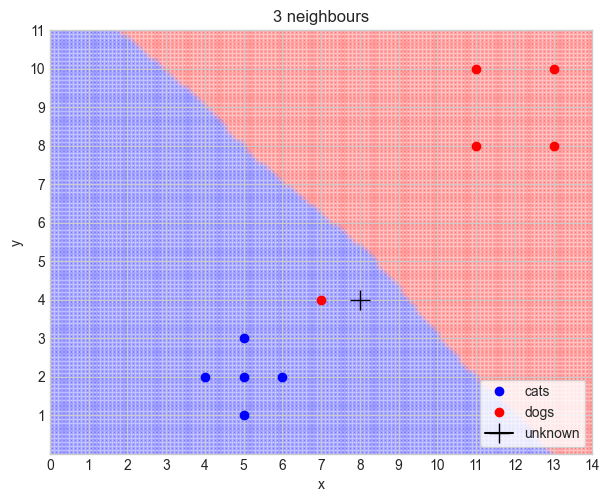

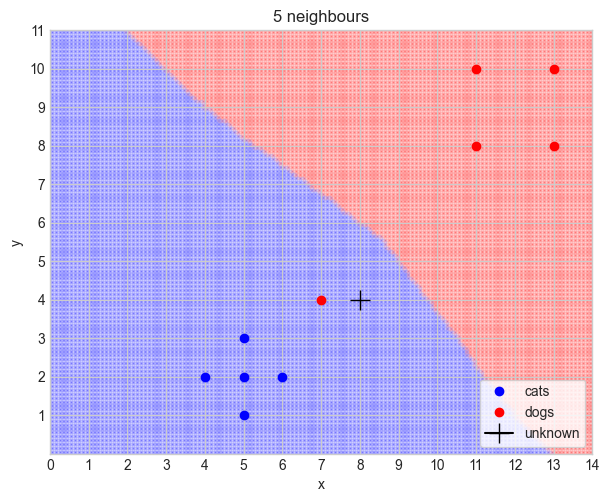

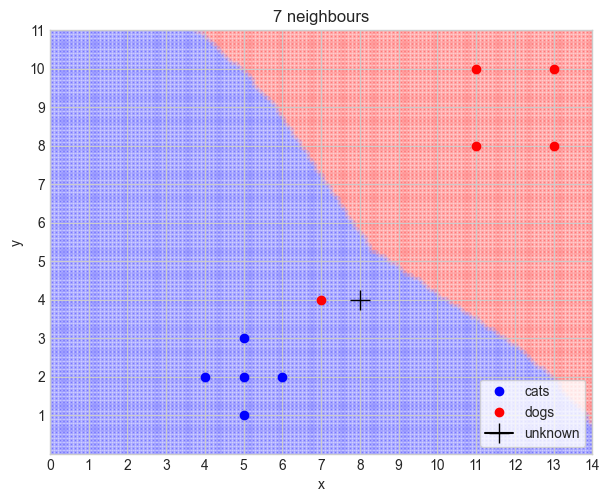

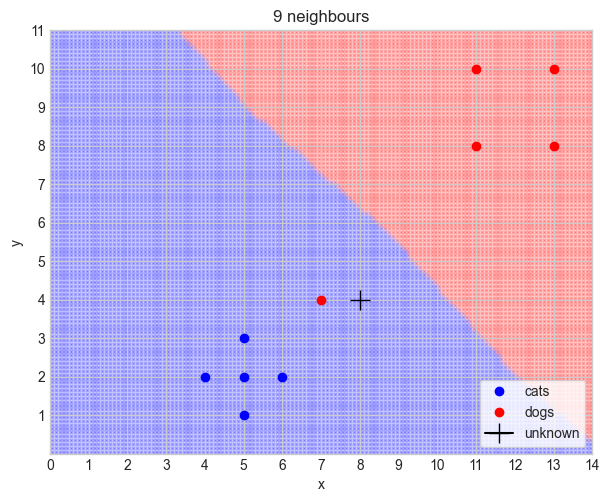

In [151]:
for i in range(1, 11, 2):
    model = KNeighborsClassifier(n_neighbors=i)
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

In the KNeighborsClassifier, the default metric is minkowski, and with p=2 it is equivalent to the standard Euclidean distance. However, we can also use some other distance measures.

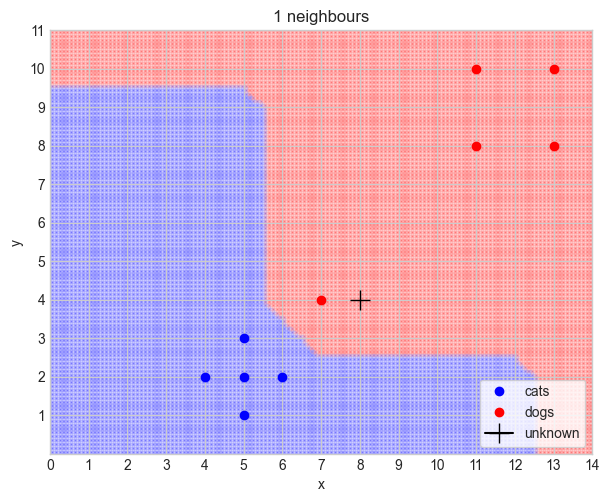

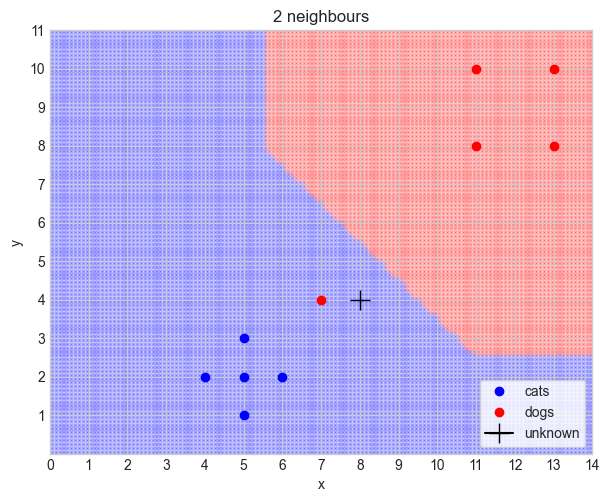

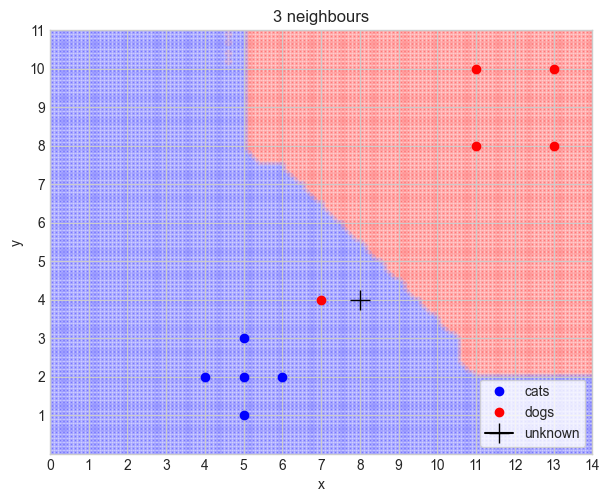

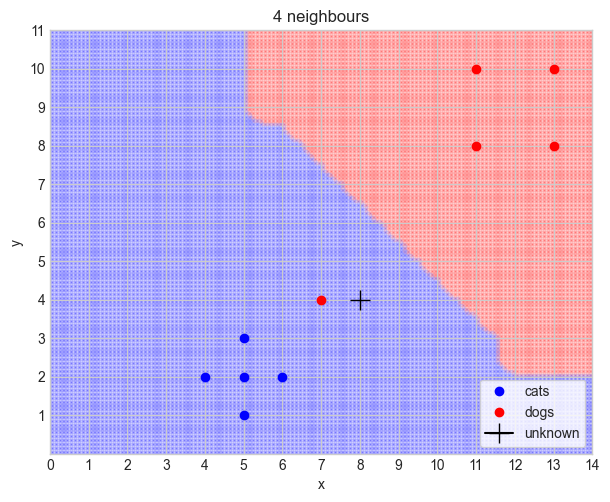

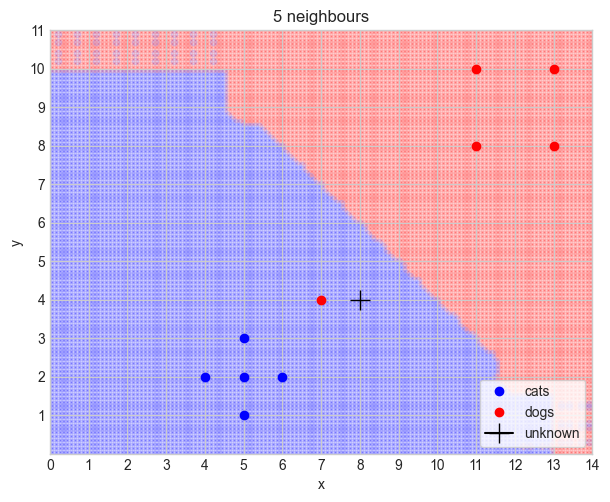

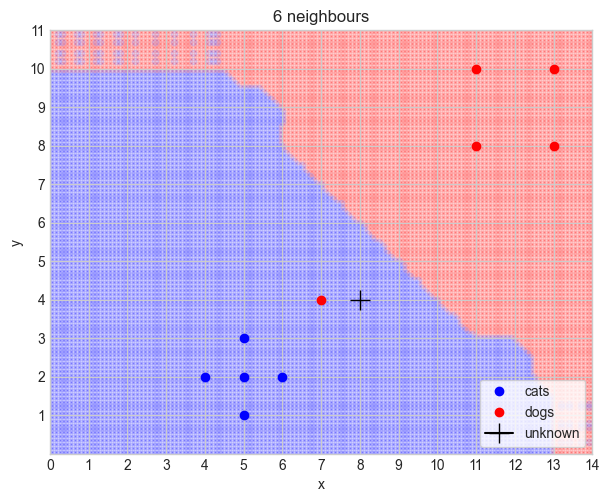

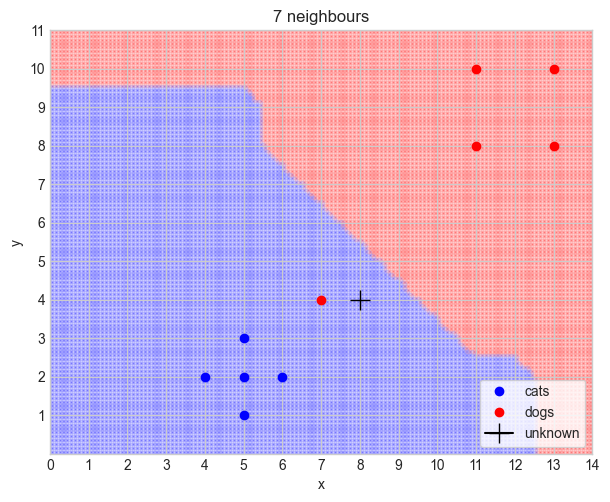

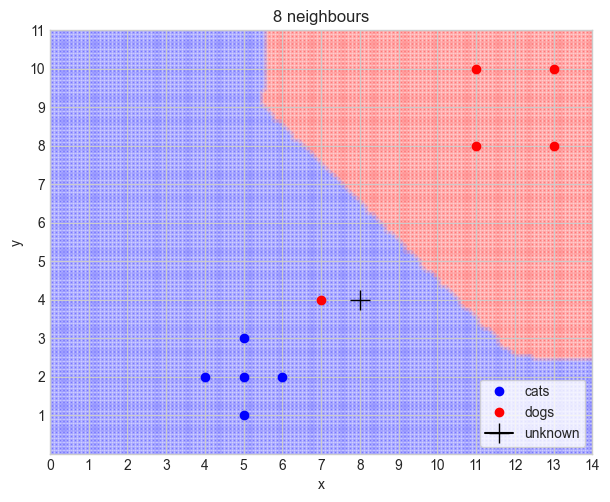

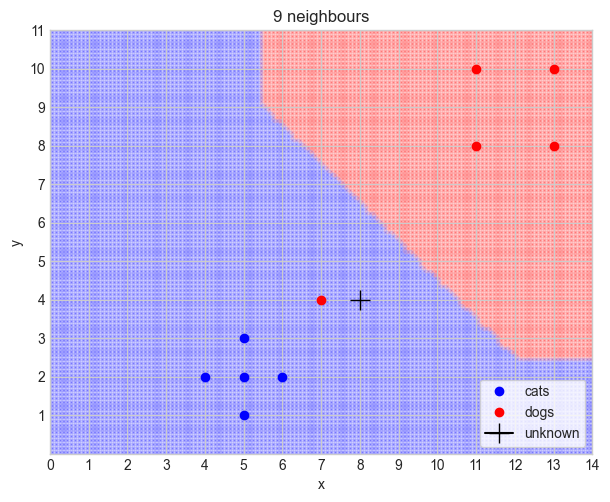

In [152]:
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

We can use weights to weight each neighbour's vote inversely to its distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

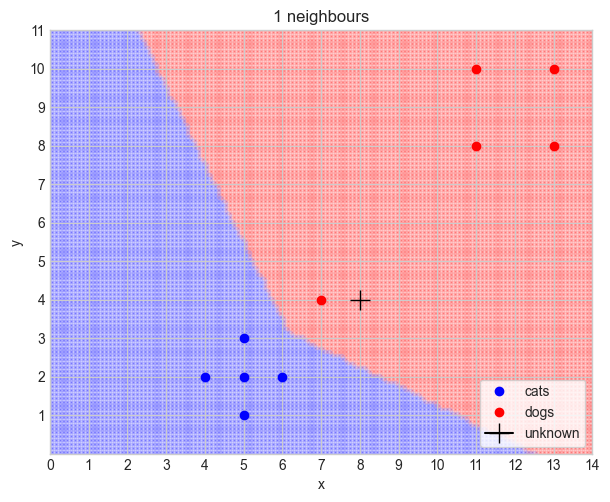

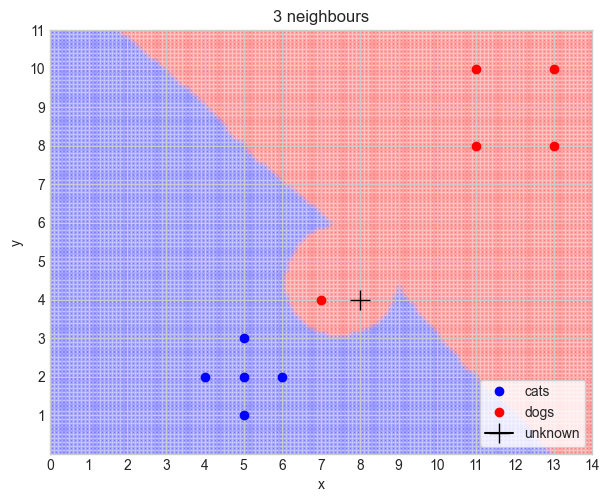

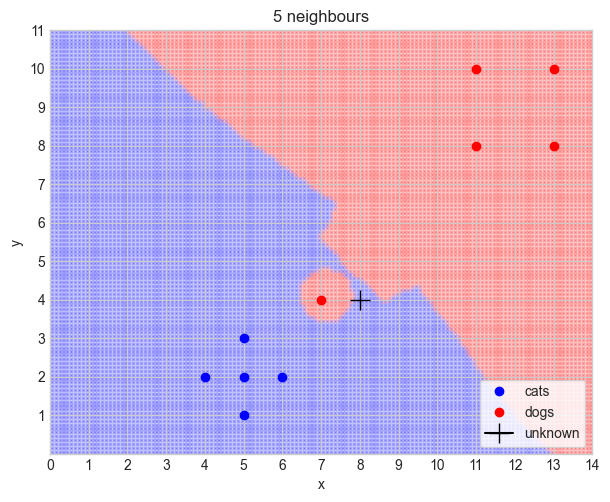

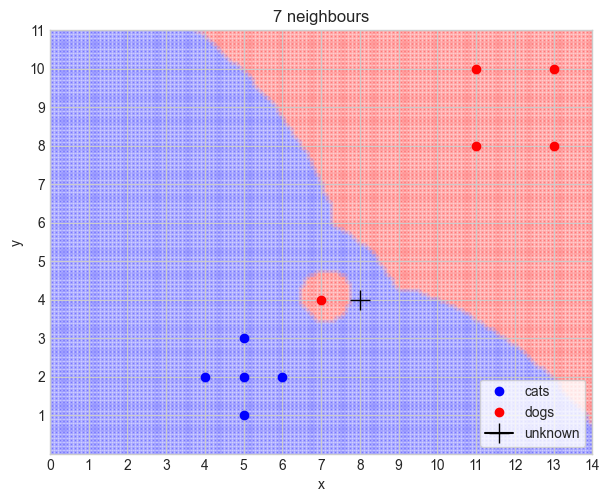

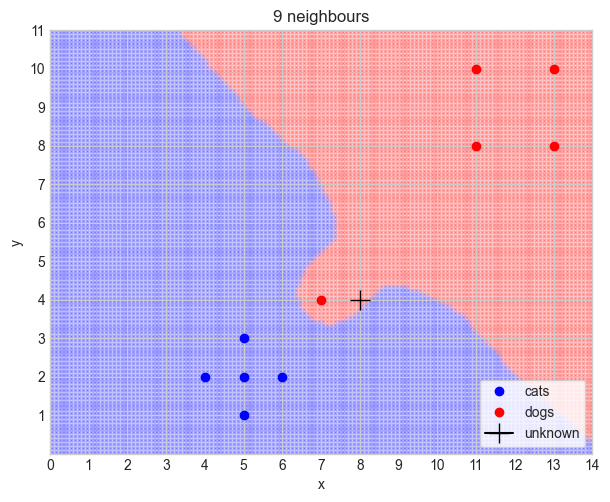

In [153]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()
    

Now, let's use distance weighting and Manhattan distance instead of Euclidean distance.

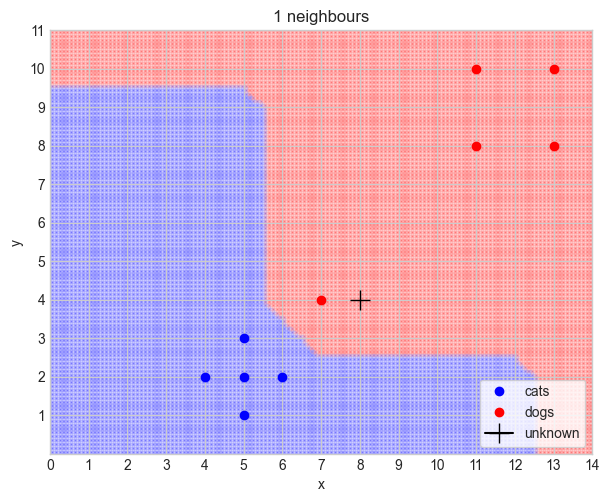

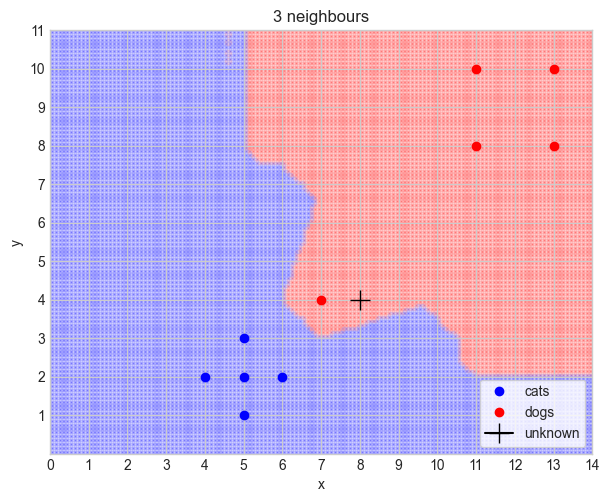

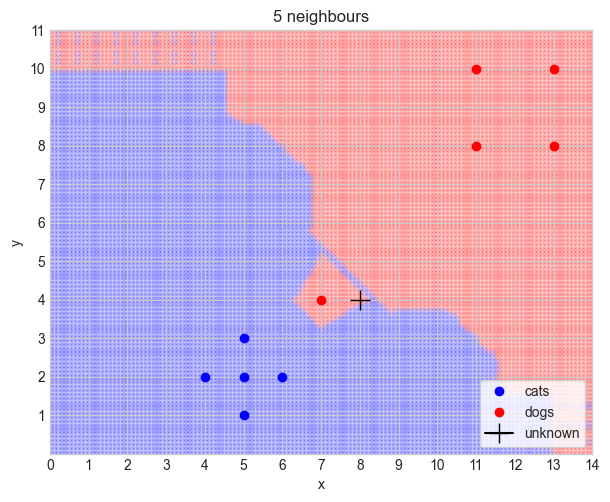

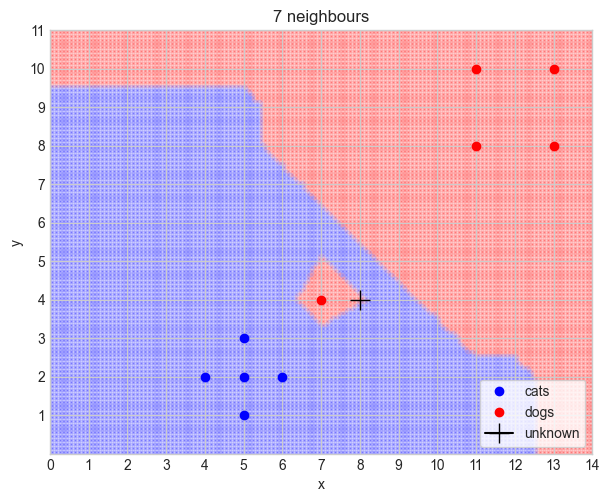

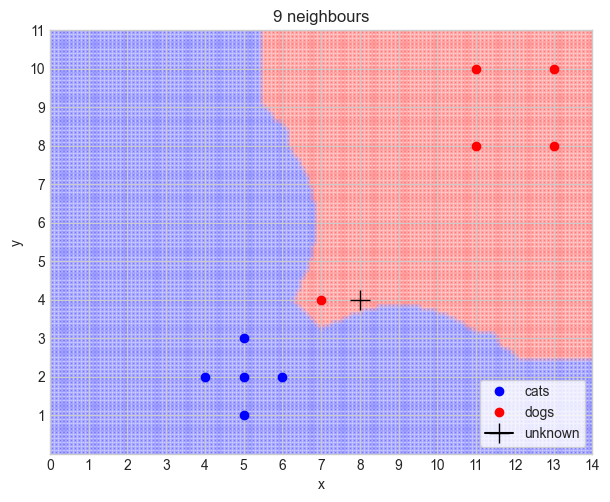

In [154]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

# Naive-Bayes 

Now implement your own Naive Bayes method. You can fill in the methods in the prepared class `MyNaiveBayes` in `Courses/MachineLearning/Labs/Lab_files/Lab1/naive_bayes.py` script. Don't worry about the implementation speed at the moment, although, it would be good if you use your experience with Python to come up with an implementation that would also be efficient. Feel free to add methods or change the existing ones, but make sure that the functions `fit` and `predict` will still be in the class. 

If you implement everything correctly, you will get about $82.17\%$ accuracy on the test set without smoothing and $81.25\%$ with Laplace smoothing (don't forget to take into account the number of labels for this dataset).

In [155]:
X_train

,buying,maint,doors,persons,lug-boot,safety
520,high,vhigh,5more,2,big,med
621,high,high,5more,2,small,low
1017,med,high,3,more,small,low
1273,med,low,5more,2,med,med
924,med,vhigh,4,2,big,low
...,...,...,...,...,...,...
835,high,low,4,more,big,med
1216,med,low,3,2,small,med
1653,low,low,3,2,big,low
559,high,high,2,more,small,med


In [156]:
# %cd C:\Users\King\Desktop\ML Labs\Lab_files\Lab1
# from naive_bayes import MyNaiveBayes
# %cd ../

In [157]:
X_test

,buying,maint,doors,persons,lug-boot,safety
1318,low,vhigh,2,more,med,med
124,vhigh,high,2,4,big,med
648,high,med,2,2,small,low
249,vhigh,med,3,2,big,low
1599,low,med,5more,2,big,low
...,...,...,...,...,...,...
960,med,vhigh,5more,4,big,low
814,high,low,4,2,med,med
752,high,med,5more,more,med,high
744,high,med,5more,4,big,low


In [158]:
class MyNaiveBayes:
    def __init__(self, smoothing=False):
        self.smoothing = smoothing

    def fit(self, X_train, y_train):

        self.X_train = X_train
        self.y_train = y_train
        self.labels = self.y_train.unique()
        self.categories = self.X_train.columns
        self.priors = self.calculate_priors()
        self.likelihoods = self.calculate_likelihoods()

    def predict(self, X_test):
        prediction = []
        for i in range(X_test.shape[0]):
            predict = {}
            for j in self.labels:
                pred = 1
                for k in self.categories:
                    pred *= self.likelihoods[j][k][X_test.iloc[i][k]]
                predict[j] = pred * self.priors[j]
            prediction.append(max(predict, key=predict.get))
        return prediction
        

    def calculate_priors(self): 
        priors = {}
        if self.smoothing:
            for i in self.labels:
                priors[i] = (self.y_train.value_counts()[i]+1)/(len(self.y_train)+2)
        else:
            for i in self.labels:
                priors[i] = (self.y_train.value_counts()[i])/(len(self.y_train))
       
        return priors

    def calculate_likelihoods(self):

        likelihoods = {}
        for i in self.labels:
            label_data = self.X_train[self.y_train == i]
            likelihoods[i] = {}
            for j in self.categories:
                likelihoods[i][j] = {}
                for k in self.X_train[j].unique():
                    if self.smoothing:
                        likelihoods[i][j][k] = (label_data[j].value_counts()[k]+1)/(self.y_train.value_counts()[i]+2)

                    else:
                        likelihoods[i][j][k] = label_data[j].value_counts()[k]/self.y_train.value_counts()[i]
        return likelihoods

In [42]:
import numpy as np


class MyNaiveBayes:
  def __init__(self, smoothing=False):
      self.smoothing = smoothing
    
  def fit(self, X_train, y_train):
      # use this method to learn the model
      # if you feel it is easier to calculate priors 
      # and likelihoods at the same time
      # then feel free to change this method
      self.X_train = X_train
      self.y_train = y_train
      self.priors = self.calculate_priors()
      self.likelihoods = self.calculate_likelihoods()      
      
  def predict(self, X_test):
      # recall: posterior is P(label_i|feature_j)
      # hint: Posterior probability is a matrix of size 
      #       m*n (m samples and n labels)
      #       our prediction for each instance in data is the class that 
      #       has the highest posterior probability. 
      #       You do not need to normalize your posterior, 
      #       meaning that for classification, prior and likelihood are enough
      #       and there is no need to divide by evidence. Think why!
      # return: a list of class labels (predicted)
      ##### YOUR CODE STARTS HERE ##### 
      likelihoods = self.likelihoods
      priors = self.priors
      labels = self.y_train.unique()
      nr_test = X_test.shape[0]
      prediction = []
      for i in range(nr_test):
        instance = X_test.iloc[i,:]
        probs = []
        for label in labels:
          prob = priors[priors.index == label]
          for idx, feature in enumerate(instance):
            prob *= likelihoods[f'{idx}={feature}|{label}']
          probs.append(prob)
        prediction.append(labels[np.argmax(probs)])
      ##### YOUR CODE ENDS HERE #####       
      return np.array(prediction)

  def calculate_priors(self):
      # recall: prior is P(label=l_i)
      # hint: store priors in a pandas Series or a list
      ##### YOUR CODE STARTS HERE #####             
      priors = (self.y_train.value_counts())/(len(self.y_train))
      ##### YOUR CODE ENDS HERE #####         
      return priors
  
  def calculate_likelihoods(self):
      # recall: likelihood is P(feature=f_j|label=l_i)
      # hint: store likelihoods in a data structure like dictionary:
      #        feature_j = [likelihood_k]
      #        likelihoods = {label_i: [feature_j]}
      #       Where j implies iteration over features, and 
      #             k implies iteration over different values of feature j. 
      #       Also, i implies iteration over different values of label. 
      #       Likelihoods, is then a dictionary that maps different label 
      #       values to its corresponding likelihoods with respect to feature
      #       values (list of lists).
      #
      #       NB: The above pseudocode is for the purpose of understanding
      #           the logic, but it could also be implemented as it is.
      #           You are free to use any other data structure 
      #           or way that is convenient to you!
      #
      #       More Coding Hints: You are encouraged to use Pandas as much as
      #       possible for all these parts as it comes with flexible and
      #       convenient indexing features which makes the task easier.
      ##### YOUR CODE STARTS HERE ##### 
      X_train = self.X_train
      y_train = self.y_train
      labels = y_train.unique()
      nr_labels = len(labels)
      smoothing = self.smoothing
      nr_features = X_train.shape[1]
      likelihoods = {}
      for label in labels:
        for col_id in range(nr_features):
          feature = X_train.iloc[:,col_id]
          levels = feature.unique()
          for level in levels:
            label_mask = y_train == label
            likelihoods[f'{col_id}={level}|{label}'] = ((
                (feature == level) & (label_mask)
                ).sum() + 1 * smoothing)/ (
                    (label_mask).sum() + len(levels) * smoothing)
      ##### YOUR CODE ENDS HERE ##### 
      return likelihoods

In [159]:
model = MyNaiveBayes(smoothing=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy(predictions, y_test)

0.8287037037037037

In [160]:
# without smoothing
model = MyNaiveBayes(smoothing=False)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy(predictions, y_test)

0.8217592592592593

## Comparing with `sklearn` implementation

For `sklearn`'s Naive Bayes implementation the data should be converted to numeric as in the case of KNN.

Sklearn has different types of Naive Bayes classifiers such as `GaussianNB`, `MultinomialNB`, `BernouliNB` etc., for different types of data. To learn more about these different types visit [here](https://scikit-learn.org/stable/modules/naive_bayes.html). 

In our case we have categorical data and our assumption was that each feature has `categorical distribution` (generalization of bernouli distribution for more than 2 possible outcomes).

In [45]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB(alpha=1)
model.fit(X_train1, y_train1)

CategoricalNB(alpha=1)

In [46]:
predictions = model.predict(X_test1)
accuracy(predictions, y_test1)

0.8125

In [47]:
model = CategoricalNB(alpha=1e-10)
model.fit(X_train1, y_train1)
predictions = model.predict(X_test1)
accuracy(predictions, y_test1)

0.8217592592592593

# News Classification with Naive Bayes

Naive Bayes classifier is well-known for it's good performance on `text classification` task. Here we will go through the main concepts of text classification, before building our own model.

##The Bag of Words Model

One of the most important sub-tasks in pattern classification are `feature extraction` and `selection`. Prior to fitting the model and using machine learning algorithms for training, we need to think about how to best represent a text document as a `feature vector`. 

A commonly used model in Natural Language Processing (NLP) is the so-called `bag of words` model. The idea behind this model is very intuitive. First comes the creation of the `vocabulary` — the collection of all different words that occur in the training set and each word is associated with a count of how often it occurs.

The vocabulary can then be used to construct the d-dimensional feature vectors for the individual documents where the dimensionality is equal to the number of different words in the vocabulary. This process is called `vectorization`.

When doing the above feature extraction, we may come across the question whether we should consider `word occurrencies` (encoding with 0s and 1s) or `word frequencies` (absolute counts of the words) in the text. The answer depends on the data and it is necessary to try both approaches. In general, the first method is usually better when applied on small texts.

## Tokenization

`Tokenization` describes the general process of breaking down a text corpus into individual elements that serve as input for various NLP algorithms (we have performed this task earlier in the programming module). Usually, tokenization is accompanied by other optional processing steps, such as the removal of `stop words` and `punctuation characters`, `stemming` or `lemmatizing`, and the construction of `n-grams`. Below is an example of a simple but typical tokenization step that splits a sentence into individual words, removes punctuation, and converts all letters to lowercase.

![tokenization](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/tokenization-1.png)

## Stop words

Stop words are words that are particularly common in a text corpus and thus considered as rather un-informative (e.g., words such as `so`, `and`, `or`, `the`, ...). One approach to stop word removal is to search against a language-specific stop word dictionary. An alternative approach is to create a stop list by sorting all words in the entire text corpus by frequency. The stop list — after conversion into a set of non-redundant words — is then used to remove all those words from the input documents that are ranked among the top n words in this stop list.

![stop words](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/stop-1.png)

##Stemming and Lemmatization

`Stemming` describes the process of transforming a word into its root form. The original stemming algorithm was developed my Martin F. Porter in 1979 and is hence known as Porter stemmer.

![stemming](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/porter-1.png)

Stemming can create non-real words, such as "thu" in the example above. 

In contrast to stemming, `lemmatization` aims to obtain the canonical (grammatically correct) forms of the words, the so-called lemmas. Lemmatization is computationally more difficult and expensive than stemming, and in practice, both stemming and lemmatization have little impact on the performance of text classification.

![lemmatization](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/lemma-1.png)

##N-Grams

In the `n-gram` model, a token can be defined as a sequence of n items. The simplest case is the so-called unigram (1-gram) where each word consists of exactly one word, letter, or symbol. All previous examples were unigrams so far. Choosing the optimal number n depends on the language as well as the particular application. 

![n-grams](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/grams-1.png)

##Term Frequency - Inverse Document Frequency (Tf-idf)

The term frequency - inverse document frequency (Tf-idf) is another alternative for characterizing text documents. It can be understood as a weighted term frequency, which is especially useful if stop words have not been removed from the text corpus. 

The Tf-idf approach assumes that the importance of a word is inversely proportional to how often it occurs across all documents. 

$$\text{Tf-idf}=tf(t,d)\cdot idf(t),$$

where $tf(t,d)$ is the count of term $t$ in document $d$  
$$idf(t)=log \Big(\frac{N+1\cdot\alpha}{df(t) + 1\cdot\alpha} \Big) + 1,$$
where $N$ is the number of documents in the corpus, $df(t)$ is the number of documents containing the term $t$ and $\alpha = \{0, 1\}$ is the smoothing parameter.

## Basic examples of Vectorizing


In [48]:
X_train = ['This is a sentence!',
           'This is the other']
X_test = ["Is this a sentence?",
          "I am the sencond sentence",
          "And the third one!",
          "The sentence and a sentence"]

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Vectorizing with frequencies
# cv = CountVectorizer() 
# cv = CountVectorizer(stop_words='english')

# Vectorizing with occurrencies 
cv = CountVectorizer(binary = True)

traind = cv.fit_transform(X_train)
testd = cv.transform(X_test)

In [50]:
print('Vocabulary')
print(cv.get_feature_names()) #vocabulary
print('Train')
print(traind.toarray())
print('Test')
print(testd.toarray())

Vocabulary
['is', 'other', 'sentence', 'the', 'this']
Train
[[1 0 1 0 1]
 [1 1 0 1 1]]
Test
[[1 0 1 0 1]
 [0 0 1 1 0]
 [0 0 0 1 0]
 [0 0 1 1 0]]


C:\Users\King\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
# tfidf = TfidfVectorizer()
# tfidf = TfidfVectorizer(smooth_idf=False)
tfidf = TfidfVectorizer(stop_words='english')
 
traind1 = tfidf.fit_transform(X_train)
testd1 = tfidf.transform(X_test)

In [52]:
print('Vocabulary')
print(tfidf.get_feature_names())
print('Idf')
print(tfidf.idf_)
print('Train')
print(traind1.toarray())
print('Test')
print(testd1.toarray())

Vocabulary
['sentence']
Idf
[1.40546511]
Train
[[1.]
 [0.]]
Test
[[1.]
 [1.]
 [0.]
 [1.]]


Where is 'a'? \\
To prevent CountVectrozier from removing symbols or separate chars use [`token_pattern`](https://medium.com/@wenxuan0923/feature-extraction-from-text-using-countvectorizer-tfidfvectorizer-9f74f38f86cc#ebf4)!

## Examples on real dataset

We will be working on a real dataset that consists of news from two categories `army` and `economy` scraped from [this website](https://armenpress.am/eng/).

In [53]:
%cd C:\Users\King\Desktop\ML Labs\Lab_files\Lab1
news1 = pd.read_csv('armenpress_army.csv', encoding='utf8')
news2 = pd.read_csv('armenpress_economy.csv', encoding='utf8')

C:\Users\King\Desktop\ML Labs\Lab_files\Lab1


In [54]:
news1.head()

,article_title,article_paragraph
0,Chief of General Staff of Armenian Armed Force...,"YEREVAN, APRIL 22, ARMENPRESS. Chief of Genera..."
1,Russian mobile lab deployed in Armenian milita...,"YEREVAN, APRIL 8, ARMENPRESS. The mobile lab w..."
2,1 out of 58 new confirmed coronavirus cases in...,"YEREVAN, MARCH 30, ARMENPRESS. 1 out of the 58..."
3,Many quarantined Armenia servicemen return to ...,"YEREVAN, MARCH 30, ARMENPRESS. “Dozens” of qua..."
4,Armenia soldier wounded by Azerbaijani shooting,"YEREVAN, MARCH 27, ARMENPRESS. Soldier of the ..."


In [55]:
news1.article_paragraph = news1.article_paragraph.str.split('[0-9], ARMENPRESS.', expand=True)[1]
news2.article_paragraph = news2.article_paragraph.str.split('[0-9], ARMENPRESS.', expand=True)[1]

In [56]:
news1['type'] = 'military'
news2['type'] = 'economy'

In [57]:
news_df = pd.concat([news1, news2], axis=0, ignore_index=True)

In [58]:
news_df.isna().sum()

article_title        0
article_paragraph    1
type                 0
dtype: int64

In [59]:
news_df = news_df.dropna()

In [60]:
news_df.isna().sum()

article_title        0
article_paragraph    0
type                 0
dtype: int64

In [61]:
news_df

,article_title,article_paragraph,type
0,Chief of General Staff of Armenian Armed Force...,Chief of General Staff of the Armenian Armed ...,military
1,Russian mobile lab deployed in Armenian milita...,The mobile lab which the Russian military dep...,military
2,1 out of 58 new confirmed coronavirus cases in...,1 out of the 58 new confirmed cases of the no...,military
3,Many quarantined Armenia servicemen return to ...,“Dozens” of quarantined or self-quarantined s...,military
4,Armenia soldier wounded by Azerbaijani shooting,Soldier of the Armenian Armed Forces has been...,military
...,...,...,...
368,Priority of Armenian presidency at EEU is elim...,"Armenia, by assuming the presidency at the EE...",economy
369,EEC Minister considers exemplary Armenia’s fig...,The member states of the Eurasian Economic Un...,economy
370,EAEU member states’ GDP growth figures exceed ...,The GDP and industrial production of the Eura...,economy
371,INVEST ARMENIA 2019 Forum to gather businessme...,INVEST ARMENIA 2019 international business fo...,economy


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    news_df['article_paragraph'], news_df['type'], random_state = 0)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  279
Test dataset:  93


In [63]:
y_test.value_counts()

military    48
economy     45
Name: type, dtype: int64

### Fitting on word frequencies

In [64]:
count_vector_par = CountVectorizer(stop_words = 'english')
training_data = count_vector_par.fit_transform(X_train)
testing_data = count_vector_par.transform(X_test)

In [65]:
# count_vector.get_feature_names()
# training_data.toarray()

In [66]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB(alpha=1e-10)
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1e-10)

In [67]:
predictions = naive_bayes.predict(testing_data)

In [68]:
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.967741935483871


In [69]:
# the same as our function
accuracy(y_test, predictions)

0.967741935483871

In [70]:
y_test[predictions != y_test]

89     military
63     military
262     economy
Name: type, dtype: object

In [71]:
with pd.option_context('max_colwidth', 100):
    print(X_test[predictions != y_test])

89      After meeting representatives of the Armenian defense industry, PM Nikol Pashinyan briefed Cabi...
63      Defense Minister of Armenia Davit Tonoyan on October 7 hosted US Congresswomen, members of the ...
262     The Armenian Prime Minister will hand for the first time the Hero Of Our Times prize within the...
Name: article_paragraph, dtype: object


Now let's try with the article titles.

In [72]:
X_train2, X_test2, y_train, y_test = train_test_split(
    news_df['article_title'], news_df['type'],random_state = 0)

print("Training dataset: ", X_train2.shape[0])
print("Test dataset: ", X_test2.shape[0])

Training dataset:  279
Test dataset:  93


In [73]:
count_vector_title = CountVectorizer(stop_words = 'english')
training_data2 = count_vector_title.fit_transform(X_train2)
testing_data2 = count_vector_title.transform(X_test2)

In [74]:
naive_bayes2 = MultinomialNB(alpha=1e-10)
naive_bayes2.fit(training_data2, y_train)
predictions = naive_bayes2.predict(testing_data2)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.9032258064516129


In [75]:
y_test[predictions != y_test]

142    military
273     economy
216     economy
246     economy
220     economy
89     military
265     economy
262     economy
190     economy
Name: type, dtype: object

In [76]:
with pd.option_context('max_colwidth', 100):
  print(X_test2[predictions != y_test])

142        Armenian Minister of Defense takes part at CSTO ministerial council session in Kyrgyzstan
273                 Armenian company baffled after getting included in United States BIS Entity List
216        ‘We close the year with quite a good mood’ – Armenian PM sums up economic figures of 2019
246    Armenia welcomes any initiative aimed at deepening economic cooperation in CIS – PM Pashinyan
220       Armenia’s Civil Aviation Committee discusses possibilities of bringing new budget airlines
89                       Government to procure defense products from local manufacturers as priority
265                       Opposition MP wants ad hoc committee to look into Lydian’s spending report
262                   PM to hand over Hero Of Our Times prize for the first time on Independence Day
190                          Armenia discusses various assistance opportunities for microenterprises
Name: article_title, dtype: object


### Fitting on word occurrencies

In [77]:
occurrence_vector = CountVectorizer(stop_words = 'english', binary=True)
training_data1 = occurrence_vector.fit_transform(X_train)
testing_data1 = occurrence_vector.transform(X_test)

In [78]:
naivebayes = MultinomialNB(alpha=1e-10)
naivebayes.fit(training_data1, y_train)
predictions = naivebayes.predict(testing_data1)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.946236559139785


We can notice that the model performance decreased when we give the word occurrencies as input to the model.

In case of article titles we will have:

In [79]:
occurrence_vector_title = CountVectorizer(stop_words = 'english', binary=True)
training_data2 = occurrence_vector_title.fit_transform(X_train2)
testing_data2 = occurrence_vector_title.transform(X_test2)

In [80]:
naivebayes = MultinomialNB(alpha=1e-10)
naivebayes.fit(training_data2, y_train)
predictions = naivebayes.predict(testing_data2)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.9032258064516129


We can see that for article titles the model performance is same when we consider the word occurrencies, instead of word frequencies.

### Fitting on tf-idf

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(stop_words = 'english')
training_data1 = tfidf_vector.fit_transform(X_train)
testing_data1 = tfidf_vector.transform(X_test)

In [82]:
naive_bayes = MultinomialNB(alpha=1e-10)
naive_bayes.fit(training_data1, y_train)
predictions = naive_bayes.predict(testing_data1)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.946236559139785


### Fitting on 2-grams

First let's make sure we understand this concept on this simple example.

In [83]:
# simple example
corpus = [
       'This is the first document.',
       'This document is the second document.',
       'And this is the third one.',
       'Is this the first document?',
   ]

vectorizer2 = CountVectorizer(ngram_range=(1, 3))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())
print(X2.toarray())

['and', 'and this', 'and this is', 'document', 'document is', 'document is the', 'first', 'first document', 'is', 'is the', 'is the first', 'is the second', 'is the third', 'is this', 'is this the', 'one', 'second', 'second document', 'the', 'the first', 'the first document', 'the second', 'the second document', 'the third', 'the third one', 'third', 'third one', 'this', 'this document', 'this document is', 'this is', 'this is the', 'this the', 'this the first']
[[0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 2 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1]]


C:\Users\King\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [84]:
count_vector = CountVectorizer(stop_words = 'english',
                               ngram_range=(1, 4))
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)
naive_bayes = MultinomialNB(alpha=1e-10)
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Accuracy score:  0.978494623655914


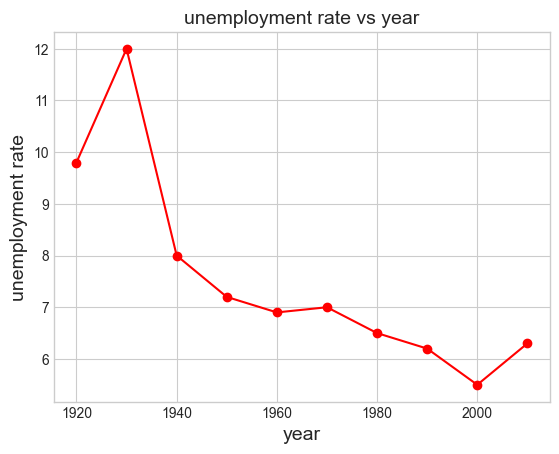

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
   
data = {'year': [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
        'unemployment_rate': [9.8, 12, 8, 7.2, 6.9, 7, 6.5, 6.2, 5.5, 6.3]
       }
  
df = pd.DataFrame(data)
  
plt.plot(df['year'], df['unemployment_rate'], color='red', marker='o')
plt.title('unemployment rate vs year', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('unemployment rate', fontsize=14)
plt.grid(True)
plt.show()